In [189]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from scipy import stats
import inspect
from numpy import median
from scipy.stats import skew
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p
from sklearn.preprocessing import power_transform

In [190]:
train_data = pd.read_csv('train.csv')
sns.set(color_codes=True)
x = np.random.normal(size=100,scale=0.1,loc=0)
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in train_data.columns:
    if train_data[i].dtype in numeric_dtypes:
        train_data[i] = train_data[i].fillna(0)
        numerics2.append(i)

skew_features = train_data[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
skew_features

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
LotFrontage       0.267547
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
Id                0.000000
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
G

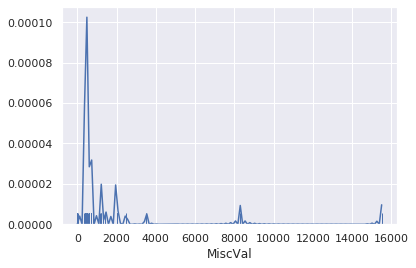

In [191]:
sns.distplot(train_data['MiscVal'], hist=False , kde=True,rug=True);

In [192]:
transformed = pd.DataFrame()
transformed2 = pd.DataFrame()
for i in skew_index:
    print(boxcox_normmax(train_data[i] + 1))
    transformed[i] = boxcox1p(train_data[i], boxcox_normmax(train_data[i] + 1))
    transformed2[i] = train_data[i] + 1
transformed2     

0.02544625827662414
0.5368163707377352
-0.00934768621762675
0.03169428531781937
-0.0963540375384244
0.09849886892910105
0.17922590803615707
0.428386927325976
-0.04475624475284085


/home/victor/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/victor/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3429: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


0.37282130433465627
0.4174177776018605
0.45114561520277274
-0.054537891296236145
0.6675819938263883
0.6548189867547992
0.7836713124769246
0.19349343292995552
-0.08529436149170913
0.010543840809423118
0.5836446774598872
1.0689849557304023
0.5449748318676124
0.13233945683971154
1.1783855482196262
0.7802485244349986
0.9840131624710832


,MiscVal,PoolArea,LotArea,3SsnPorch,LowQualFinSF,KitchenAbvGr,BsmtFinSF2,ScreenPorch,BsmtHalfBath,EnclosedPorch,...,MSSubClass,1stFlrSF,GrLivArea,BsmtUnfSF,2ndFlrSF,OverallCond,TotRmsAbvGrd,HalfBath,Fireplaces,BsmtFullBath
0,1,1,8451,1,1,2,1,1,1,1,...,61,857,1711,151,855,6,9,2,1,2
1,1,1,9601,1,1,2,1,1,2,1,...,21,1263,1263,285,1,9,7,1,2,1
2,1,1,11251,1,1,2,1,1,1,1,...,61,921,1787,435,867,6,7,2,2,2
3,1,1,9551,1,1,2,1,1,1,273,...,71,962,1718,541,757,6,8,1,2,2
4,1,1,14261,1,1,2,1,1,1,1,...,61,1146,2199,491,1054,6,10,2,2,2
5,701,1,14116,321,1,2,1,1,1,1,...,51,797,1363,65,567,6,6,2,1,2
6,1,1,10085,1,1,2,1,1,1,1,...,21,1695,1695,318,1,6,8,1,2,2
7,351,1,10383,1,1,2,33,1,1,229,...,61,1108,2091,217,984,7,8,2,3,2
8,1,1,6121,1,1,3,1,1,1,206,...,51,1023,1775,953,753,6,9,1,3,1
9,1,1,7421,1,1,3,1,1,1,1,...,191,1078,1078,141,1,7,6,1,3,2


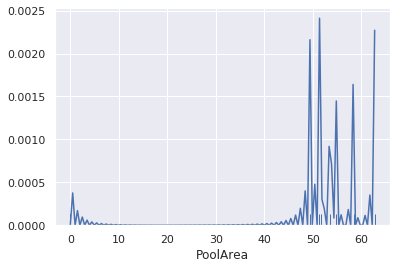

In [193]:
sns.distplot(transformed['PoolArea'], hist=False , kde=True,rug=True);

In [194]:
skew_features

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
LotFrontage       0.267547
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
Id                0.000000
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
G

In [195]:
transformed2 = pd.DataFrame(data = power_transform(transformed2, method='box-cox'),columns = transformed2.columns)

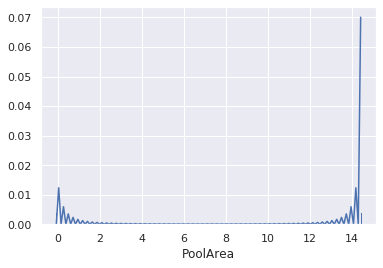

In [196]:
sns.distplot(transformed2['PoolArea'], hist=False , kde=True,rug=True);